# <center> 9. Закрепление знаний

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
churn_data = pd.read_csv('C:\IDE\project_0.5\churn.csv')
churn_data.drop(['RowNumber'],axis=1,inplace=True)

## <center> ЗАДАНИЯ
    

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.


In [2]:
fig1 = go.Figure(go.Pie(
    values = churn_data['Exited'].value_counts(),
    labels = ['Лояльные клиенты', 'Ушедшие клиенты'],
    pull = 0.1
))
fig1.update_layout(
    title = {
        'text': 'Соотношение ушедших и лояльных клиентов',
        'y': 0.9,
        'x': 0.45,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    titlefont = {'size': 24, 'color': 'green'}
)
fig1.show()

Задание 9.1. Выводы. Ушла пятая часть клиентов!!!

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.


In [3]:
fig2 = px.histogram(
    churn_data[churn_data['Balance']>2500],
    x = 'Balance',
    title = 'Число клиентов с вкладами более 2500',
    nbins = 10
)
fig2.show()

Задание 9.2. Выводы. Дохуя клентов с балансом от 100 до 150 тыщ

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.


In [4]:
fig3 = px.histogram(
    churn_data[churn_data['Balance']>2500],
    x = 'Balance',
    color = churn_data[churn_data['Balance']>2500]['Exited'].map({0:'Лояльные', 1:'Ушедшие'}),
    title = 'Число лояльных и ушедших клиентов с вкладами более 2500',
    nbins = 10
)
fig3.show()

Задание 9.3. Выводы: Дохуя ушедших клентов с балансом от 100 до 150 тыщ

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?


In [5]:
fig4 = px.histogram(
    churn_data,
    x = 'Age',
    color = churn_data['Exited'].map({0:'Лояльные', 1:'Ушедшие'}),
    title = 'Число клиентов в различных возрастных группах',
    height = 500,
    width = 1000,
    nbins = 10
)
fig4.show()

fig5 = px.box(
    churn_data,
    y = 'Exited',
    x = 'Age',
    orientation = 'h',
    height = 500,
    width = 1000,
    color = churn_data['Exited'].map({0:'Лояльные', 1:'Ушедшие'})
)
fig5.show()

Задание 9.4. Выводы: лояльных клиентов дохуя в возрастной группе от 30 до 39! 2-место: 40-49, 3-е место: 20-29.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.


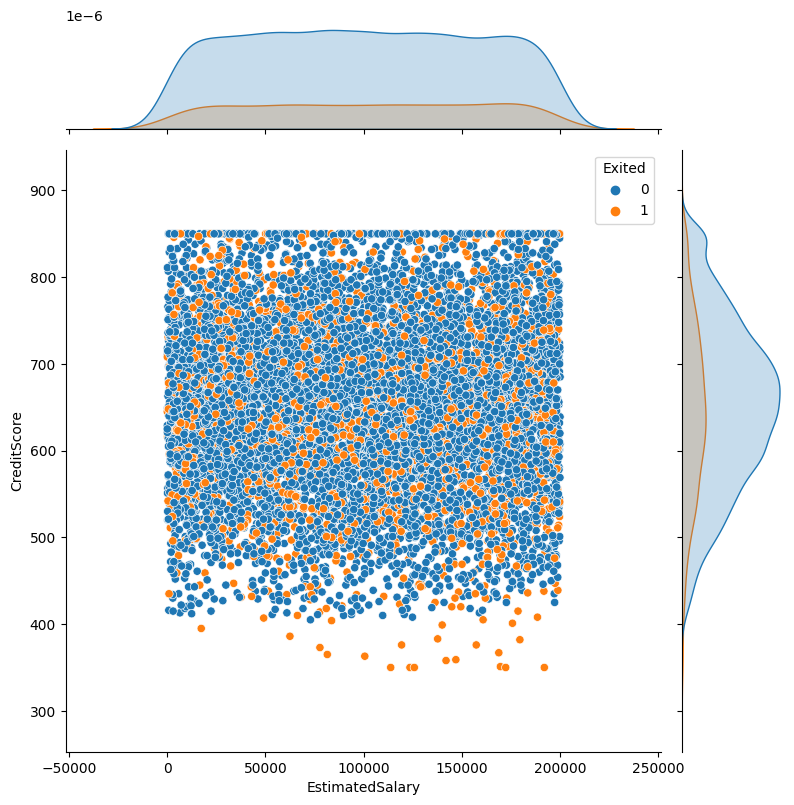

In [6]:
jointplot = sns.jointplot(
    data = churn_data,
    x = 'EstimatedSalary',
    y = 'CreditScore',
    hue = 'Exited',
    height = 8
)


Задание 9.5. Выводы:

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.



In [7]:

fig6 = px.sunburst(
    churn_data, 
    path =[churn_data['Gender'].map({'Male':'Мужчина', 'Female':'Женщина'}),
           churn_data['Exited'].map({0:'Лояльные', 1:'Ушедшие'})] 
    )
fig6.update_traces(textinfo="label + value + percent parent")


fig6.show()

Задание 9.6. Выводы:

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [8]:
bar_data_1 = churn_data.groupby(
    by =['Exited', 'NumOfProducts'],
    as_index = False
)['CustomerId'].count()

bar_data_1['Exited'] = bar_data_1['Exited'].map({0:'Лояльные клиенты',1:'Ушедшие клиенты'})

fig7 = px.bar(
    data_frame = bar_data_1,
    x = 'CustomerId',
    y = 'NumOfProducts',
    color = 'Exited',
    text = 'CustomerId',
    height = 400,
    orientation = 'h',
    title = 'Зависимость оттока клиентов от числа приобретенных услуг',
    labels = {'NumOfProducts':'Кол-во продуктов банка', 'CustomerId':'Кол-во клиентов банка', 'Exited':'Лояльность банку'}
)
fig7.show()

Задание 9.7. Выводы:

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [9]:
fig8 = px.sunburst(
    churn_data, 
    path =[churn_data['IsActiveMember'].map({1:'Активный', 0:'Пассивный'}),
           churn_data['Exited'].map({0:'Лояльные', 1:'Ушедшие'})] 
    )
fig8.update_traces(textinfo="label + value + percent parent")


fig8.show()

Задание 9.8. Выводы:

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [23]:
data_1 = churn_data.groupby(
    by =['Geography'],
    as_index = False
)['Exited'].mean()

fig9 = px.choropleth(
    data_frame=data_1, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    title='Доля ушедших клиентов на карте мира', #заголовок
    width=800, #ширина
    height=500, #высота
 )

fig9.update_geos(fitbounds='locations')
fig9.show()


9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

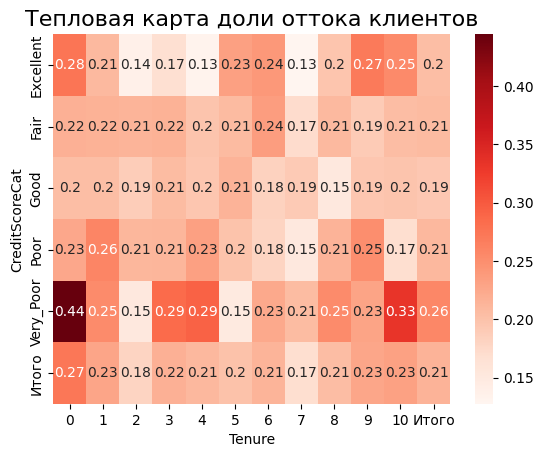

In [22]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')
heat_map=churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)

heat_map.loc['Итого']=heat_map.mean()
heat_map['Итого']=heat_map.mean(axis=1)

heatmap = sns.heatmap(data=heat_map, cmap='Reds', annot=True)
heatmap.set_title('Тепловая карта доли оттока клиентов', fontsize=16);


